## Data Profiling, Cleaning and Transformation Notebook

In this Jupyter notebook I use the below technologies:
* Python: programming language
* Pandas: an open source data analysis and manipulation tool built on top of the Python programming language.
* NumPy: a package for scientific computing in Python
* Matplotlib: a comprehensive library for creating visualizations in Python.

Contents of this include profiling the `realtor_data.csv`, `cost_living.csv`, and `world_happiness_clean.csv` files and then cleaning and transforming these data sets to merge into and create a consolidated csv file, `cl_real_happiness.csv`.

In [2]:
import pandas as pd
import numpy as np

real_data = pd.read_csv('./data/realtor-data.csv', header=0)

# Profiling
print(real_data.columns.unique()) # Column names
real_data.info()

Index(['status', 'price', 'bed', 'bath', 'acre_lot', 'full_address', 'street',
       'city', 'state', 'zip_code', 'house_size', 'sold_date'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923159 entries, 0 to 923158
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   status        923159 non-null  object 
 1   price         923088 non-null  float64
 2   bed           791456 non-null  float64
 3   bath          807967 non-null  float64
 4   acre_lot      649536 non-null  float64
 5   full_address  923159 non-null  object 
 6   street        921021 non-null  object 
 7   city          923085 non-null  object 
 8   state         923159 non-null  object 
 9   zip_code      922954 non-null  float64
 10  house_size    625316 non-null  float64
 11  sold_date     456396 non-null  object 
dtypes: float64(6), object(6)
memory usage: 84.5+ MB


In [3]:
# Profiling
real_data.groupby(by='status').status.count()

status
for_sale          921528
ready_to_build      1631
Name: status, dtype: int64

In [4]:
# Profiling price column
print(real_data['price'].mean())
print(real_data['price'].min())
print(real_data['price'].max())
print(real_data['price'].describe())

884122.5224756469
0.0
875000000.0
count    9.230880e+05
mean     8.841225e+05
std      2.623745e+06
min      0.000000e+00
25%      2.690000e+05
50%      4.750000e+05
75%      8.399000e+05
max      8.750000e+08
Name: price, dtype: float64


In [5]:
# Profiling house_size column
print(real_data['house_size'].mean())
print(real_data['house_size'].min())
print(real_data['house_size'].max())
print(real_data['house_size'].describe())

2141.644071157623
100.0
1450112.0
count    6.253160e+05
mean     2.141644e+03
std      3.035327e+03
min      1.000000e+02
25%      1.130000e+03
50%      1.651000e+03
75%      2.499000e+03
max      1.450112e+06
Name: house_size, dtype: float64


In [6]:
# Profiling house_size column
print(real_data['house_size'].mean())
print(real_data['house_size'].min())
print(real_data['house_size'].max())
print(real_data['house_size'].describe())

2141.644071157623
100.0
1450112.0
count    6.253160e+05
mean     2.141644e+03
std      3.035327e+03
min      1.000000e+02
25%      1.130000e+03
50%      1.651000e+03
75%      2.499000e+03
max      1.450112e+06
Name: house_size, dtype: float64


In [7]:
# Profiling average price of home by state
print(real_data.groupby(by='state').price.mean())

state
Connecticut       4.839807e+05
Delaware          3.452066e+05
Georgia           4.927036e+05
Maine             4.200100e+05
Massachusetts     9.757505e+05
New Hampshire     4.807679e+05
New Jersey        6.046546e+05
New York          1.711473e+06
Pennsylvania      4.245694e+05
Puerto Rico       4.371370e+05
Rhode Island      5.002155e+05
South Carolina    1.895000e+04
Tennessee         3.490000e+04
Vermont           4.572101e+05
Virgin Islands    7.951458e+05
Virginia          3.620645e+05
West Virginia     6.250000e+04
Wyoming           5.350000e+05
Name: price, dtype: float64


In [8]:
print(real_data.duplicated()) # Check for duplicates
print(real_data.shape) # Check for number of rows
real_data.drop_duplicates(inplace=True) # remove duplicate rows
print(real_data.shape) # Check for number of rows without duplicates

0         False
1         False
2         False
3         False
4         False
          ...  
923154     True
923155     True
923156     True
923157     True
923158     True
Length: 923159, dtype: bool
(923159, 12)
(113789, 12)


In [105]:
print(real_data.groupby(by='state').price.mean()) #average price by state
print(f"Number of NY addresses is: {real_data[real_data.state == 'New York'].shape}") # Checking for the number of NY address

state
Connecticut       7.073607e+05
Delaware          3.776940e+05
Georgia           5.071912e+05
Maine             5.020344e+05
Massachusetts     1.082850e+06
New Hampshire     5.880774e+05
New Jersey        5.864585e+05
New York          2.006497e+06
Pennsylvania      4.522881e+05
Puerto Rico       6.337029e+05
Rhode Island      5.820423e+05
Vermont           5.587689e+05
Virgin Islands    1.579529e+06
West Virginia     6.250000e+04
Wyoming           5.350000e+05
Name: price, dtype: float64
Number of NY addresses is: (19219, 13)


state
Connecticut       13839
Delaware           1298
Georgia               5
Maine              5061
Massachusetts     10193
New Hampshire      3561
New Jersey        32759
New York          28634
Pennsylvania       9065
Puerto Rico        2664
Rhode Island       3419
South Carolina        1
Tennessee             1
Vermont            2530
Virgin Islands      750
Virginia              7
West Virginia         1
Wyoming               1
Name: state, dtype: int64
['Connecticut', 'Delaware', 'Georgia', 'Maine', 'Massachusetts', 'New Hampshire', 'New Jersey', 'New York', 'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina', 'Tennessee', 'Vermont', 'Virgin Islands', 'Virginia', 'West Virginia', 'Wyoming']
[13839, 1298, 5, 5061, 10193, 3561, 32759, 28634, 9065, 2664, 3419, 1, 1, 2530, 750, 7, 1, 1]


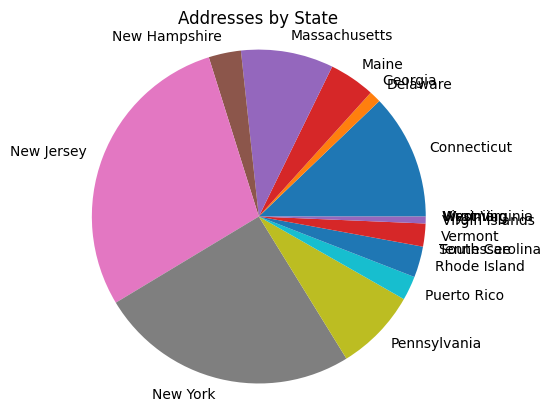

In [10]:
print(real_data.groupby(by='state').state.count()) # checking for the number of rows for each state

# Create pie chart to better visualize the mix of addresses by state

import matplotlib.pyplot as plt

labels = list(real_data['state'].sort_values().unique())
print(labels)

num_address_by_state = list(real_data.groupby(by='state')['state'].count())
print(num_address_by_state)

# 'subplot' returns two values: a figure and subplots
fig1, ax1 = plt.subplots()

# we use the 2nd value from 'subplot' to make a pie chart:
ax1.pie(num_address_by_state, labels=labels)

# this just ensures that pie is drawn as a circle:
ax1.axis('equal')  

# give the chart a title
plt.title("Addresses by State")

# style it:
plt.style.use('dark_background')

# show the chart:
plt.show()

In [11]:
# Add columns to data set that converts price per square ft and square meters

# function that gets a row as input, then gets the value from price and house_size columns to calc price per sq ft
def price_per_sqft_convert(row):
    price_per_sqft = row.price / row.house_size
    return price_per_sqft

# function that gets a row as input, then gets the value from price per sq ft and converts to price per sq meters
def sqft_to_meters_convert(row):
    sq_ft = row.house_size
    sq_meters = sq_ft * 0.092903
    
    price_per_sq_meters = row.price / sq_meters
    return price_per_sq_meters

real_data['price_per_sq_ft'] = real_data.apply(price_per_sqft_convert, axis=1)
real_data['price_per_sq_meter'] = real_data.apply(sqft_to_meters_convert, axis=1)

print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']].shape)

# Remove the NaN by converting string 'NaN' to NaN: 
def Nan_check(value):
    if value == 'NaN':
        value = np.nan
        return value
    else:
        return value

real_data.house_size = real_data.house_size.map(Nan_check)
real_data.price_per_sq_ft = real_data.price_per_sq_ft.map(Nan_check)
real_data.price_per_sq_meter = real_data.price_per_sq_meter.map(Nan_check)

real_data.dropna(subset=['house_size'], inplace=True) # drop NaN for house size

print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']].shape) # check to see number of rows removed from dropna()
print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']])

(113789, 4)
(77341, 4)
            price  house_size  price_per_sq_ft  price_per_sq_meter
0        105000.0       920.0       114.130435         1228.490305
1         80000.0      1527.0        52.390308          563.924823
2         67000.0       748.0        89.572193          964.147471
3        145000.0      1800.0        80.555556          867.093157
5        179000.0      2520.0        71.031746          764.579680
...           ...         ...              ...                 ...
923135  1649000.0      2178.0       757.116621         8149.538990
923136   779000.0      1816.0       428.964758         4617.340212
923144  1595000.0      2231.0       714.926042         7695.403185
923146  4595000.0      4863.0       944.889986        10170.715538
923147  2995000.0      3446.0       869.123622         9355.172832

[77341 rows x 4 columns]


In [12]:
# Rounding the prices per sq ft/meters to two decimal places

real_data.price_per_sq_ft = real_data.price_per_sq_ft.map(lambda v: round(float(v), 2))
real_data.price_per_sq_meter = real_data.price_per_sq_meter.map(lambda v: round(float(v), 2))

print(real_data[['price', 'house_size', 'price_per_sq_ft', 'price_per_sq_meter']])

            price  house_size  price_per_sq_ft  price_per_sq_meter
0        105000.0       920.0           114.13             1228.49
1         80000.0      1527.0            52.39              563.92
2         67000.0       748.0            89.57              964.15
3        145000.0      1800.0            80.56              867.09
5        179000.0      2520.0            71.03              764.58
...           ...         ...              ...                 ...
923135  1649000.0      2178.0           757.12             8149.54
923136   779000.0      1816.0           428.96             4617.34
923144  1595000.0      2231.0           714.93             7695.40
923146  4595000.0      4863.0           944.89            10170.72
923147  2995000.0      3446.0           869.12             9355.17

[77341 rows x 4 columns]


In [13]:
# Drop the 'for_sale' and 'sold_date' columns as will not be needed

real_data.drop(['status', 'sold_date'], axis=1, inplace=True)

print(real_data.columns.unique())

Index(['price', 'bed', 'bath', 'acre_lot', 'full_address', 'street', 'city',
       'state', 'zip_code', 'house_size', 'price_per_sq_ft',
       'price_per_sq_meter'],
      dtype='object')


In [14]:
# export the cleaned up dataset to csv
real_data.to_csv('./data/clean_realtor_data.csv', index=False)

In [15]:

# Import the data sets and merge cost of living with realtor data

real_data = pd.read_csv('./data/clean_realtor_data.csv', header=0) 
cost_living = pd.read_csv('./data/cost_living.csv', header=0)

# Cleaning and Transforming Cost of Living data
# Remove the NaN by converting string 'NaN' to NaN: 
def Nan_check(value):
    if value == 'NaN':
        value = np.nan
        return value
    else:
        return value

cost_living['Price per Square Meter to Buy Apartment in City Centre (USD)'] = cost_living['Price per Square Meter to Buy Apartment in City Centre (USD)'].map(Nan_check)

cost_living.dropna(subset=['Price per Square Meter to Buy Apartment in City Centre (USD)'], inplace=True) # drop NaN for house size

# Identify that only city, country and price per sq meter are only needed, so create new dataframe:
cost_living_city_country_price = cost_living[['city', 'country', 'Price per Square Meter to Buy Apartment in City Centre (USD)']]
# Rename to price per sq meter
cost_living_city_country_price.rename(columns={'Price per Square Meter to Buy Apartment in City Centre (USD)':'price_per_sq_meter'}, inplace=True)
#print(cost_living_city_country_price.head())


# Cleaning and Transforming Realtor data
# Add country column in prep to link with other data sets that have country level data
real_data['country'] = 'United States'

# Get average price per sq meter at city level and create new dataframe:
realtor_city_country_price = real_data.groupby(by=['city','country']).price_per_sq_meter.mean()
realtor_city_country_price = realtor_city_country_price.reset_index()

print(realtor_city_country_price)

# Consolidate the realtor data with the cost of living data
cost_living_realtor_left = pd.concat([cost_living_city_country_price, realtor_city_country_price], axis=0)

# Remove any duplicate rows
cost_living_realtor_left.drop_duplicates(inplace=True)
print(cost_living_realtor_left.shape)

cost_living_realtor_left.to_csv('./data/cost_living_with_realtor.csv', index=False)

                  city        country  price_per_sq_meter
0                Abbot  United States         1877.075000
1             Aberdeen  United States         2918.241579
2             Abington  United States         2885.208519
3              Absecon  United States         1683.338222
4               Accord  United States         3570.840000
...                ...            ...                 ...
2341            Yeadon  United States         1539.942857
2342           Yonkers  United States         3038.872885
2343              York  United States         4409.410345
2344  Yorktown Heights  United States         3699.293529
2345             Yulan  United States         2145.080000

[2346 rows x 3 columns]
(5079, 3)


/Users/Ruben/Desktop/team-week/venv/lib/python3.7/site-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [103]:

# Profile and join the cl_real and happiness files
import pandas as pd
import numpy as np

cl_real = pd.read_csv('./data/cost_living_with_realtor.csv', header=0)
happiness = pd.read_csv('./data/world_happiness_clean.csv', header=0)

print(cl_real.shape)
print(happiness.shape)

# Rename the Country name column in happiness data in prep for the merge 
happiness.columns = happiness.columns.str.replace('Country name', 'country')

# Merge as an outert to get all data sets at country
cl_real_happiness = pd.merge(cl_real, happiness, how='outer', on='country')
print(cl_real_happiness.tail())

# Rename the columns to call out if data is at city or country level
cl_real_happiness.rename(columns=lambda v: v + ' (country)', inplace = True)
cl_real_happiness.rename(columns={'city (country)': "city", 'country (country)': "country", 'price_per_sq_meter (country)': "price_per_sq_meter (city)"}, inplace = True)
print(cl_real_happiness.shape)

# Export the cleaned up data to csv
cl_real_happiness.to_csv('./data/cl_real_happiness.csv', index=False)

(5079, 3)
(153, 8)
     city                   country  price_per_sq_meter  Ladder score  \
5090  NaN          Congo (Kinshasa)                 NaN          4.31   
5091  NaN                   Myanmar                 NaN          4.31   
5092  NaN                   Comoros                 NaN          4.29   
5093  NaN                   Lesotho                 NaN          3.65   
5094  NaN  Central African Republic                 NaN          3.48   

      Logged GDP per capita  Social support  Healthy life expectancy  \
5090                   6.69            0.67                    52.90   
5091                   8.68            0.78                    58.96   
5092                   7.83            0.63                    57.35   
5093                   7.96            0.78                    48.00   
5094                   6.63            0.32                    45.20   

      Freedom to make life choices  Generosity  Perceptions of corruption  
5090                          0.7